Function definition: Define a function histogram_equalization(image)
that takes a grayscale image as input. The function should perform the following 
steps:
• Calculate the histogram of the image.
• Compute the cumulative distribution function (CDF) of the histogram.
• Normalize the CDF to obtain a probability distribution function (PDF).
• Map the PDF values back to intensity levels (0-255) for the equalized 
image.
• Apply the mapping to the original image to obtain the equalized image.
• Plot the histograms of both the original and equalized images.
• The function should return the equalized image

Enter image path:  C:\Users\A J Laptops\Desktop\Mphil 24-26\image processing\images\A_high-contrast_artistic_depiction_of_a_lone_tree_.jpg


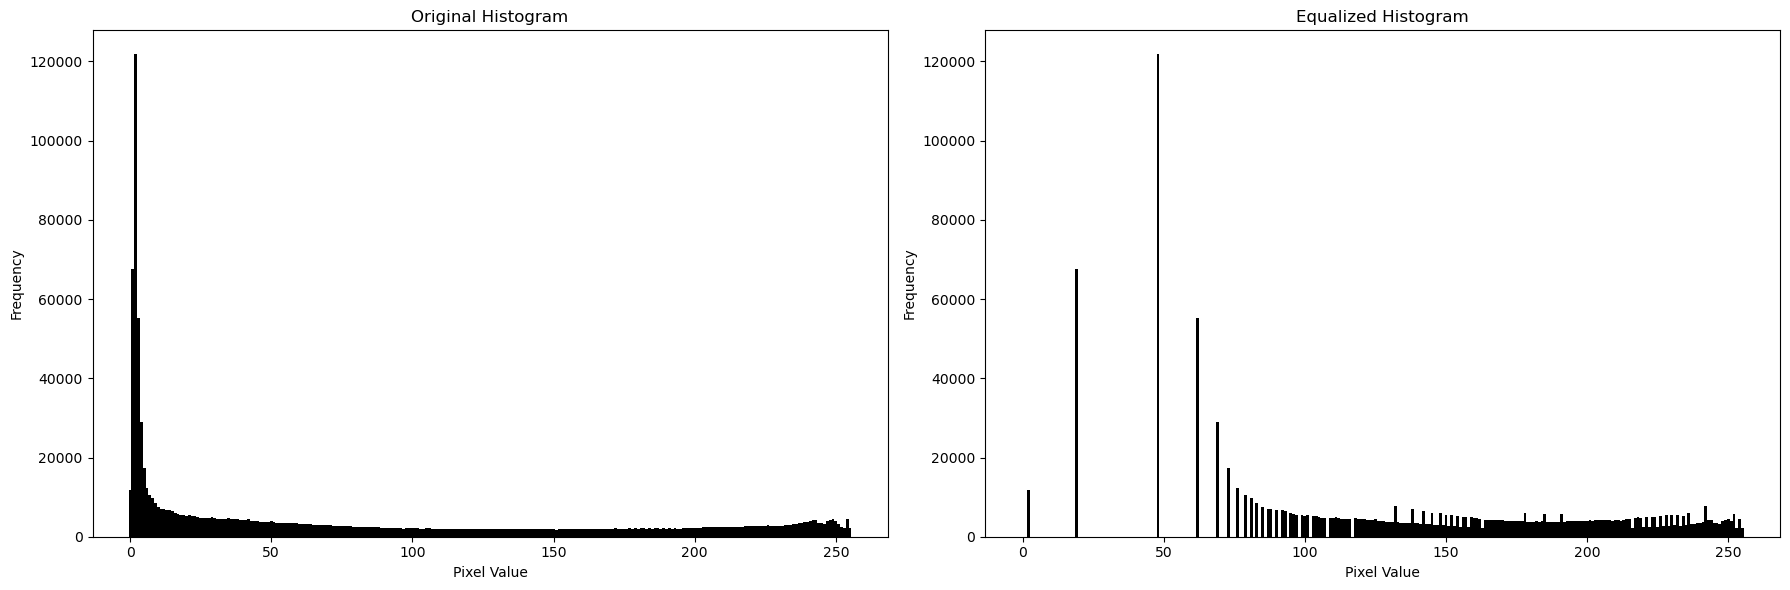

In [93]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def histogram_equalization(image):
    if image.mode != 'L':
        raise ValueError("Please provide a grayscale image")
    
    histogram = np.array(image.histogram())
    
    hist_norm = histogram / histogram.sum()
    cdf = hist_norm.cumsum()
    
    pdf = np.diff(cdf, prepend=0)
    
    lut = np.floor(255 * cdf).astype('uint8')
    
    equalized_image_array = lut[np.array(image)]
    equalized_image = Image.fromarray(equalized_image_array)
    
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(256), histogram, width=1, color='black')
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    equalized_histogram = np.array(equalized_image.histogram())
    plt.subplot(1, 2, 2)
    plt.bar(range(256), equalized_histogram, width=1, color='black')
    plt.title('Equalized Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return equalized_image

image_path = input('Enter image path: ')
try:
    image = Image.open(image_path).convert('L')
    equalized_image = histogram_equalization(image)
    equalized_image.show()
except ValueError as e:
    print(e)
except FileNotFoundError:
    print("Image path is invalid or the image could not be read")
